In [ ]:
import pandas as pd


def get_error(filename):
  print(filename)
  df=pd.read_csv(filename)
  indexes = df[df > 3].stack().index.tolist()

  print(indexes)
filenames=['3p_gold_gemma_EN.csv','3p_llm_gemma_EN.csv','3p_gold_llama_EN.csv','3p_llm_llama_EN.csv',
           '3p_gold_gemma_FR.csv','3p_llm_gemma_FR.csv','3p_gold_llama_FR.csv','3p_llm_llama_FR.csv']
for file in filenames:
  get_error(file)


3p_gold_gemma_EN.csv
[]
3p_llm_gemma_EN.csv
[]
3p_gold_llama_EN.csv
[]
3p_llm_llama_EN.csv
[]
3p_gold_gemma_FR.csv
[]
3p_llm_gemma_FR.csv
[]
3p_gold_llama_FR.csv
[]
3p_llm_llama_FR.csv
[]


In [ ]:
df2=pd.read_csv('3p_llm_llama_FR.csv', index_col=[0])
print(df2.columns)
df2.drop(df2.columns[df2.columns.str.contains(
    'Unnamed', case=False)], axis=1, inplace=True)
df2.to_csv('3p_llm_llama_FR.csv', index=False)

Index(['factuality', 'clarity', 'answer relevance', 'precision',
       'context relevance', 'completeness', 'references', 'Average'],
      dtype='object')


In [ ]:
import pandas as pd

filenames = [
    '3p_gold_gemma_EN.csv', '3p_llm_gemma_EN.csv', '3p_gold_llama_EN.csv', '3p_llm_llama_EN.csv',
    '3p_gold_gemma_FR.csv', '3p_llm_gemma_FR.csv', '3p_gold_llama_FR.csv', '3p_llm_llama_FR.csv'
]

def recompute_average(filename):
    df = pd.read_csv(filename)

    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

    cols_to_average = df.columns[df.columns != 'Average']

    df['Average'] = df[cols_to_average].mean(axis=1)

    df.to_csv(filename, index=False)

for filename in filenames:
    recompute_average(filename)

print("Average columns recomputed for all files.")


Average columns recomputed for all files.


FOR ENGLISH GEMMA

In [ ]:
import pandas as pd

gemmaG = pd.read_csv('3p_gold_gemma_EN.csv')
gemmaL = pd.read_csv('3p_llm_gemma_EN.csv')


gold_higher = (gemmaG['Average'] > gemmaL['Average']).sum()
llm_higher = (gemmaG['Average'] < gemmaL['Average']).sum()
ties = (gemmaG['Average'] == gemmaL['Average']).sum()


goldRate = (gold_higher / len(gemmaG)) * 100
llmRate = (llm_higher / len(gemmaG)) * 100
tiesRate = (ties / len(gemmaG)) * 100

print(f"Gold higher count: {gold_higher} ({goldRate:.2f}%)")
print(f"LLM higher count: {llm_higher} ({llmRate:.2f}%)")
print(f"Ties count: {ties} ({tiesRate:.2f}%)")


Gold higher count: 148 (29.90%)
LLM higher count: 68 (13.74%)
Ties count: 279 (56.36%)


FOR LLAMA

In [ ]:
import pandas as pd

llamaG = pd.read_csv('3p_gold_llama_EN.csv')
llamaL = pd.read_csv('3p_llm_llama_EN.csv')

gold_higher = (llamaG['Average'] > llamaL['Average']).sum()
llm_higher = (llamaG['Average'] < llamaL['Average']).sum()
ties = (llamaG['Average'] == llamaL['Average']).sum()

gold_higher_pct = (gold_higher / len(llamaG)) * 100
llm_higher_pct = (llm_higher / len(llamaG)) * 100
ties_pct = (ties / len(llamaG)) * 100

print(f"Gold higher count: {gold_higher} ({gold_higher_pct:.2f}%)")
print(f"LLM higher count: {llm_higher} ({llm_higher_pct:.2f}%)")
print(f"Ties count: {ties} ({ties_pct:.2f}%)")


Gold higher count: 0 (0.00%)
LLM higher count: 483 (97.58%)
Ties count: 12 (2.42%)


In [ ]:
import pandas as pd
from collections import Counter

gemmaG = pd.read_csv('3p_gold_gemma_EN.csv')
gemmaL = pd.read_csv('3p_llm_gemma_EN.csv')
llamaG = pd.read_csv('3p_gold_llama_EN.csv')
llamaL = pd.read_csv('3p_llm_llama_EN.csv')


gold = (gemmaG['Average'] + llamaG['Average']) / 2
llm = (gemmaL['Average'] + llamaL['Average']) / 2

counter = Counter()

for gg_mean, ll_mean in zip(gold, llm):
    if gg_mean > ll_mean:
        counter['gold_higher'] += 1
    elif gg_mean < ll_mean:
        counter['llm_higher'] += 1
    else:
        counter['mean_ties'] += 1

total_comparisons = len(gold)
print(len(gold))

gold_mean_higher_pct = (counter['gold_higher'] / total_comparisons) * 100
llm_mean_higher_pct = (counter['llm_higher'] / total_comparisons) * 100
mean_ties_pct = (counter['mean_ties'] / total_comparisons) * 100

print(f"Gold mean higher count: {counter['gold_higher']} ({gold_mean_higher_pct:.2f}%)")
print(f"LLM mean higher count: {counter['llm_higher']} ({llm_mean_higher_pct:.2f}%)")
print(f"Ties count: {counter['mean_ties']} ({mean_ties_pct:.2f}%)")


495
Gold mean higher count: 83 (16.77%)
LLM mean higher count: 382 (77.17%)
Ties count: 30 (6.06%)


FOR FRENCH GEMMA

In [ ]:
import pandas as pd

gemmaG = pd.read_csv('3p_gold_gemma_FR.csv')
gemmaL = pd.read_csv('3p_llm_gemma_FR.csv')


gold_higher = (gemmaG['Average'] > gemmaL['Average']).sum()
llm_higher = (gemmaG['Average'] < gemmaL['Average']).sum()
ties = (gemmaG['Average'] == gemmaL['Average']).sum()


goldRate = (gold_higher / len(gemmaG)) * 100
llmRate = (llm_higher / len(gemmaG)) * 100
tiesRate = (ties / len(gemmaG)) * 100

print(f"Gold higher count: {gold_higher} ({goldRate:.2f}%)")
print(f"LLM higher count: {llm_higher} ({llmRate:.2f}%)")
print(f"Ties count: {ties} ({tiesRate:.2f}%)")


Gold higher count: 93 (18.79%)
LLM higher count: 71 (14.34%)
Ties count: 331 (66.87%)


LLAMA

In [ ]:
import pandas as pd

llamaG = pd.read_csv('3p_gold_llama_FR.csv')
llamaL = pd.read_csv('3p_llm_llama_FR.csv')

gold_higher = (llamaG['Average'] > llamaL['Average']).sum()
llm_higher = (llamaG['Average'] < llamaL['Average']).sum()
ties = (llamaG['Average'] == llamaL['Average']).sum()

gold_higher_pct = (gold_higher / len(llamaG)) * 100
llm_higher_pct = (llm_higher / len(llamaG)) * 100
ties_pct = (ties / len(llamaG)) * 100

print(f"Gold higher count: {gold_higher} ({gold_higher_pct:.2f}%)")
print(f"LLM higher count: {llm_higher} ({llm_higher_pct:.2f}%)")
print(f"Ties count: {ties} ({ties_pct:.2f}%)")


Gold higher count: 71 (14.34%)
LLM higher count: 286 (57.78%)
Ties count: 138 (27.88%)


In [ ]:
import pandas as pd
from collections import Counter

gemmaG = pd.read_csv('3p_gold_gemma_FR.csv')
gemmaL = pd.read_csv('3p_llm_gemma_FR.csv')
llamaG = pd.read_csv('3p_gold_llama_FR.csv')
llamaL = pd.read_csv('3p_llm_llama_FR.csv')


gold = (gemmaG['Average'] + llamaG['Average']) / 2
llm = (gemmaL['Average'] + llamaL['Average']) / 2

counter = Counter()

for gg_mean, ll_mean in zip(gold, llm):
    if gg_mean > ll_mean:
        counter['gold_higher'] += 1
    elif gg_mean < ll_mean:
        counter['llm_higher'] += 1
    else:
        counter['mean_ties'] += 1

total_comparisons = len(gold)
print(len(gold))

gold_mean_higher_pct = (counter['gold_higher'] / total_comparisons) * 100
llm_mean_higher_pct = (counter['llm_higher'] / total_comparisons) * 100
mean_ties_pct = (counter['mean_ties'] / total_comparisons) * 100

print(f"Gold mean higher count: {counter['gold_higher']} ({gold_mean_higher_pct:.2f}%)")
print(f"LLM mean higher count: {counter['llm_higher']} ({llm_mean_higher_pct:.2f}%)")
print(f"Ties count: {counter['mean_ties']} ({mean_ties_pct:.2f}%)")


495
Gold mean higher count: 107 (21.62%)
LLM mean higher count: 269 (54.34%)
Ties count: 119 (24.04%)


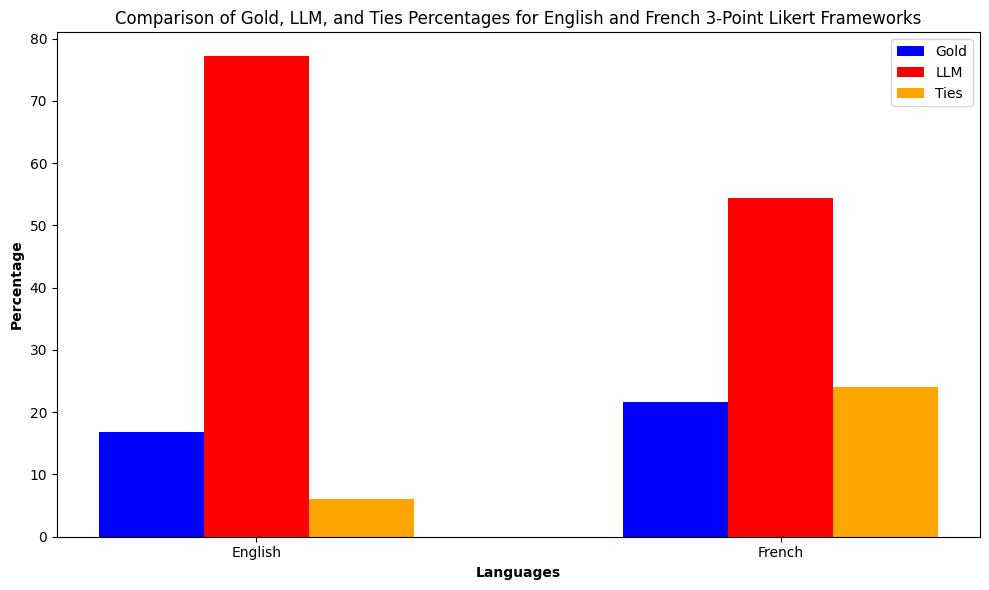

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


categories = ['English', 'French']
gold_percentages = [16.77, 21.62]
llm_percentages = [77.17, 54.34]
ties_percentages = [6.06, 24.04]

bar_width = 0.2

r1 = np.arange(len(categories))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.figure(figsize=(10, 6))

plt.bar(r1, gold_percentages, color='b', width=bar_width,  label='Gold')

plt.bar(r2, llm_percentages, color='r', width=bar_width,  label='LLM')

plt.bar(r3, ties_percentages, color='orange', width=bar_width, label='Ties')

plt.xlabel('Languages', fontweight='bold')
plt.ylabel('Percentage', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(categories))], categories)
plt.title('Comparison of Gold, LLM, and Ties Percentages for English and French 3-Point Likert Frameworks')


plt.legend()

plt.tight_layout()
plt.show()


Pearson correlation: 0.3292238694790928
Cohen's Kappa: -0.010410287813839458


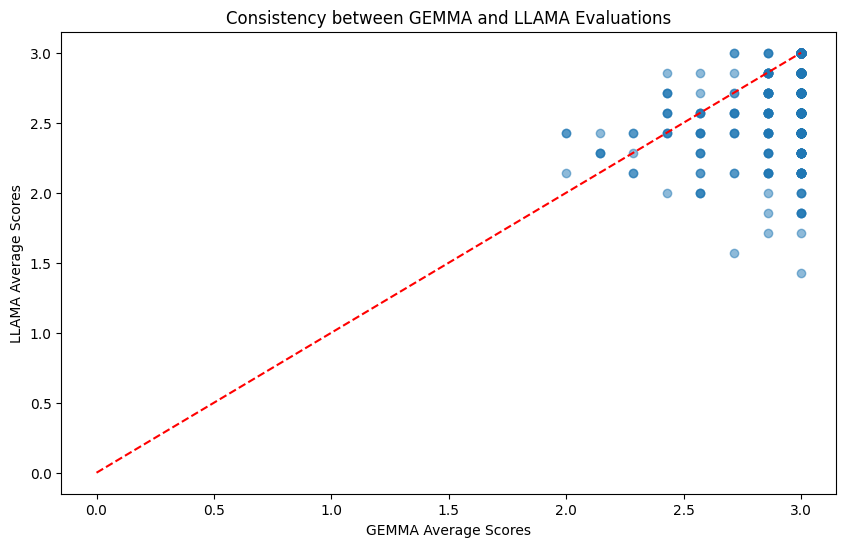

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.metrics import cohen_kappa_score

gemma_df = pd.read_csv('3p_gold_gemma_FR.csv')
llama_df = pd.read_csv('3p_gold_llama_FR.csv')

gemma_avg = gemma_df['Average']
llama_avg = llama_df['Average']

correlation, _ = pearsonr(gemma_avg, llama_avg)
print(f'Pearson correlation: {correlation}')


gemma_bin = gemma_avg.apply(lambda x: 1 if x > 2 else 0)
llama_bin = llama_avg.apply(lambda x: 1 if x > 2 else 0)
kappa = cohen_kappa_score(gemma_bin, llama_bin)
print(f'Cohen\'s Kappa: {kappa}')

plt.figure(figsize=(10, 6))
plt.scatter(gemma_avg, llama_avg, alpha=0.5)
plt.xlabel('GEMMA Average Scores')
plt.ylabel('LLAMA Average Scores')
plt.title('Consistency between GEMMA and LLAMA Evaluations')
plt.plot([0, 3], [0, 3], 'r--')
plt.show()
